### Description
* Please complete all the exercises in this homework in order. The main objective of the homework is to walk you through a toy problem for regression.
* The data for this homework is available in the `.db` file provided inside this folder. Please use this file to extract the data using SQL.
* Complete the exercises by filling in each code cell below. No need to create a separate file. Simply add your code to each cell and then run it.
* Once you complete your homework, please upload the notebook to your forked repo.
* Deadline: 15 Nov 2021 @ 23.59.59 EEST

#### Step 1 - Connect to the SQLite database using sqlite3

In [36]:
# Your code goes here
import sqlite3
conn = sqlite3.connect("homework4.db")

#### Step 2 - Load the data using pandas.read_sql()
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html

In [37]:
# Your code goes here
import pandas as pd
df = pd.read_sql("select * from homework4", conn)

#### Step 3 - Explore the data
Before building a model, check out your data and ensure that it is clean. Things you should be careful about include:

* null or missing values
* unmatched data types
* anomalies (very large or very small values)
* duplicated values

Please note that your data set is a modified version of the data available here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [38]:
# Your code goes here
run = True  
if run:
    ids = df["id"]
    df = df.set_index(ids)
    df.drop(columns=['id'], axis=1, inplace=True)
    df.head()

Please provide a description of your findings below:

* Finding 1:

#### Step 4 - Clean your data

* Remove null or missing values
* Clean data types
* Remove outliers

In [39]:
# Your code goes here
print(f"Initial number of obs: {len(df)}")
df = df.drop_duplicates()
print(f"Removed duplicates number of obs: {len(df)}")

Initial number of obs: 884
Removed duplicates number of obs: 442


#### Step 5 - Split your dataset into a training and test data set using scikit-learn's train_test_split() method

In [40]:
# Your code goes here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df["target"]
df.drop(columns=["target"], axis=1, inplace=True)
X = df

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6 - Develop a class that accepts X, y on the constructor and implements the functionality highlighted below. 

* The constructor takes in a matrix, X, with the observations (independent variables) and the target, y, (dependent variable)
* Has a method fit where it trains THREE different regressors
* Reports the average of all predictors as the final target value 
* Can compute the MSE and MAE for any prediction
* Has a method predict that can be used to predict the target variable for unseen data. The final prediction is an
average off the values predicted by the regressors
* (Optional) Extend the class to use an arbitrary number of regressors 

In [42]:
# Implement the methods below + add any methods you think are necessary to create this Regressor class
class Regressor:
    def __init__(self, X, y):
        pass 
    
    def fit(self, *args, **kwargs):
        pass 
    
    def predict(self, *args, **kwargs):
        pass 
    
    def mse(self, *args, **kwargs):
        pass
    
    def mae(self, *args, **kwargs):
        pass

#### Step 7 - Train a Regressor on the data provided using the class you created

In [43]:
# Your code goes here

#### Step 8 - Validate the regressors MAE and MSE on the training set

In [44]:
# Your code goes here

#### Step 9 - Validate the regressor's MAE and MSE on the test set

In [45]:
# Your code goes here

#### Step 10 - What conclusions can you draw from the MSE and MAE? 
* Is your model accurately predicting the target?
* Do you think you are overfitting?
* Do you think your model is biased?
* What could you do to improve your regressor's predictive power?

In [46]:
# Your code goes here

#### Step 11 - Visualise your data (optional)

Your data is multi-dimensional. Can you think of a way to visualise the data and the regressor results? 

In [47]:
# Your code goes here
r = LinearRegression()
r = r.fit(X_train, y_train)
y_train_pred = r.predict(X_train)
y_test_pred = r.predict(X_test)

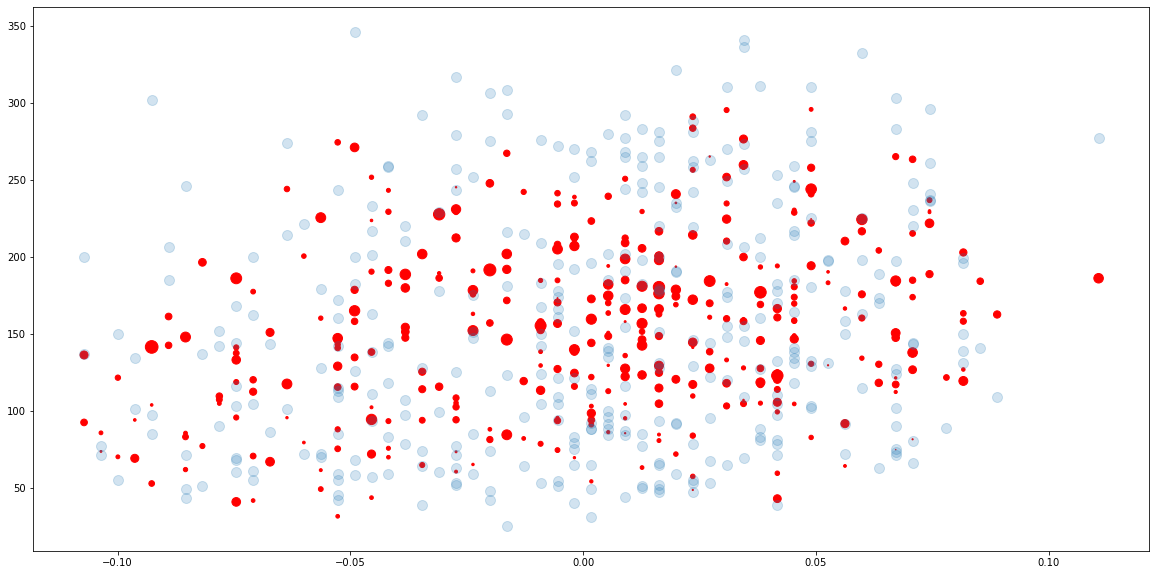

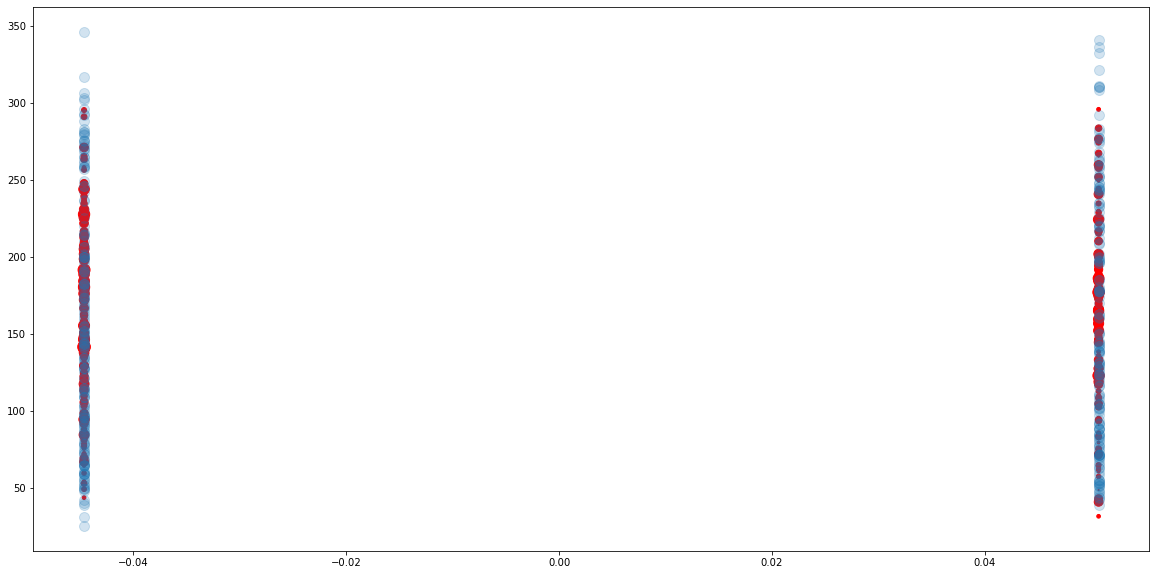

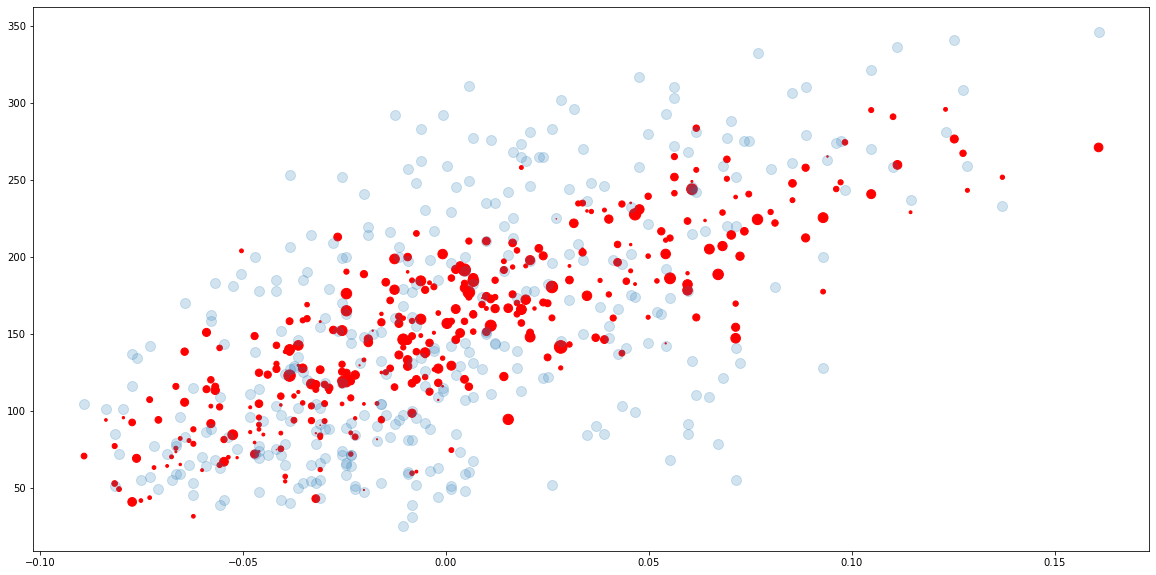

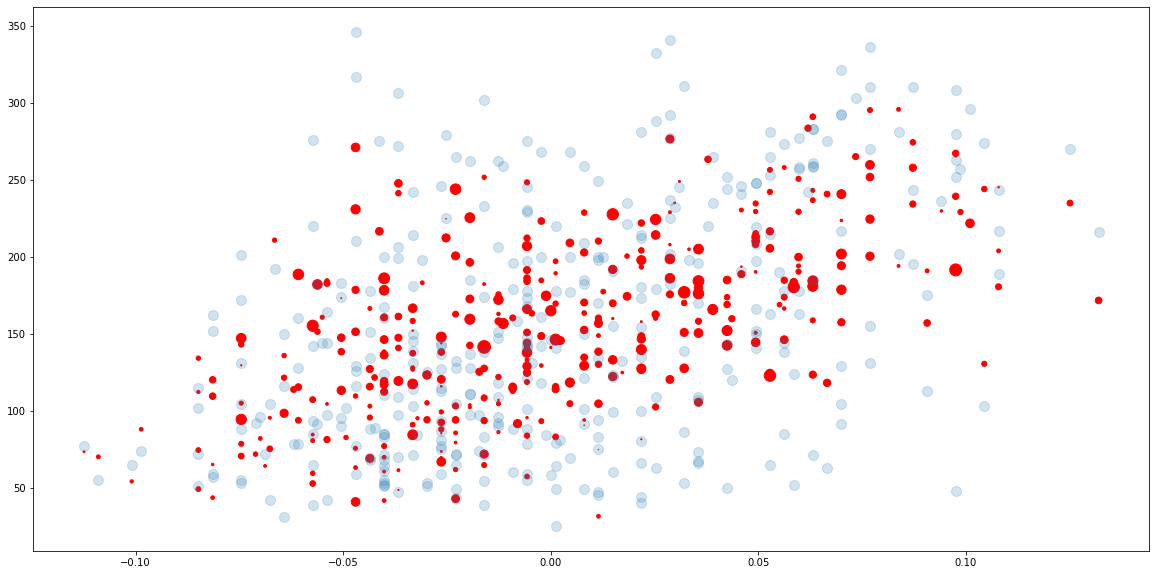

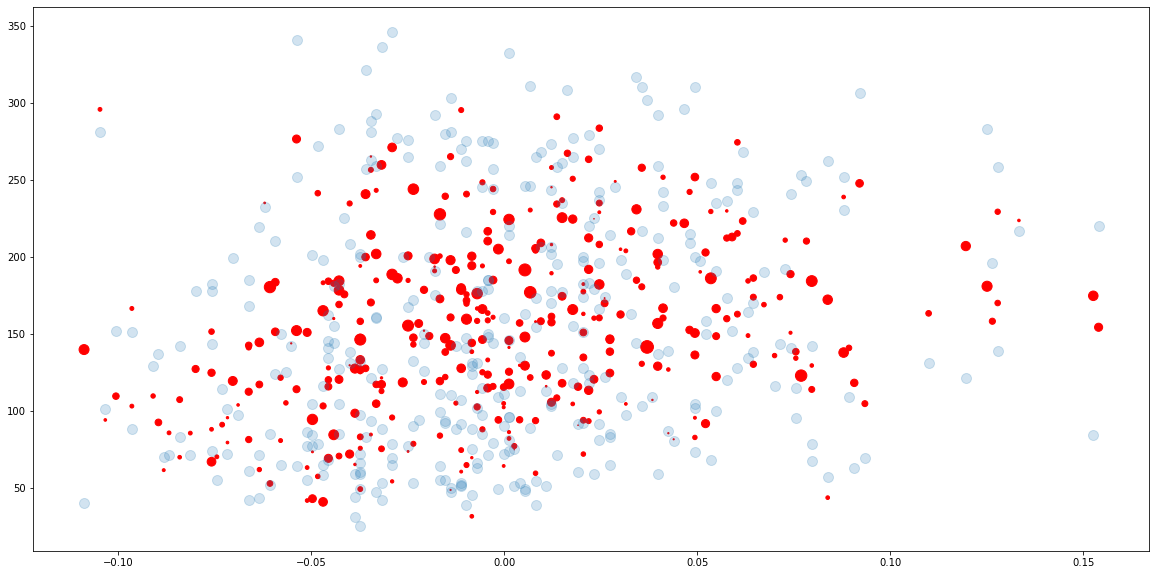

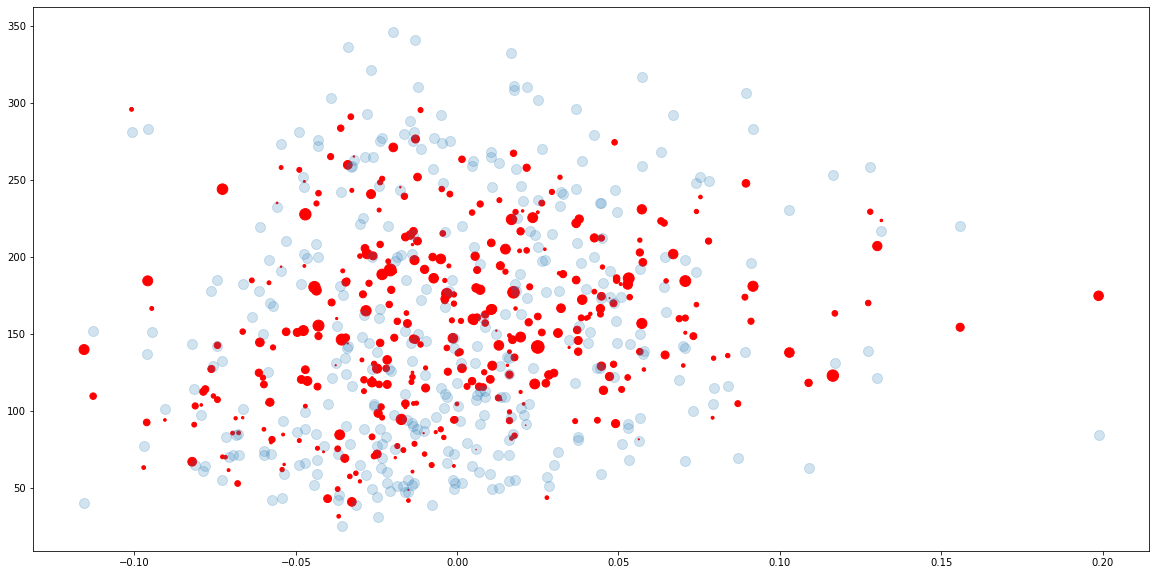

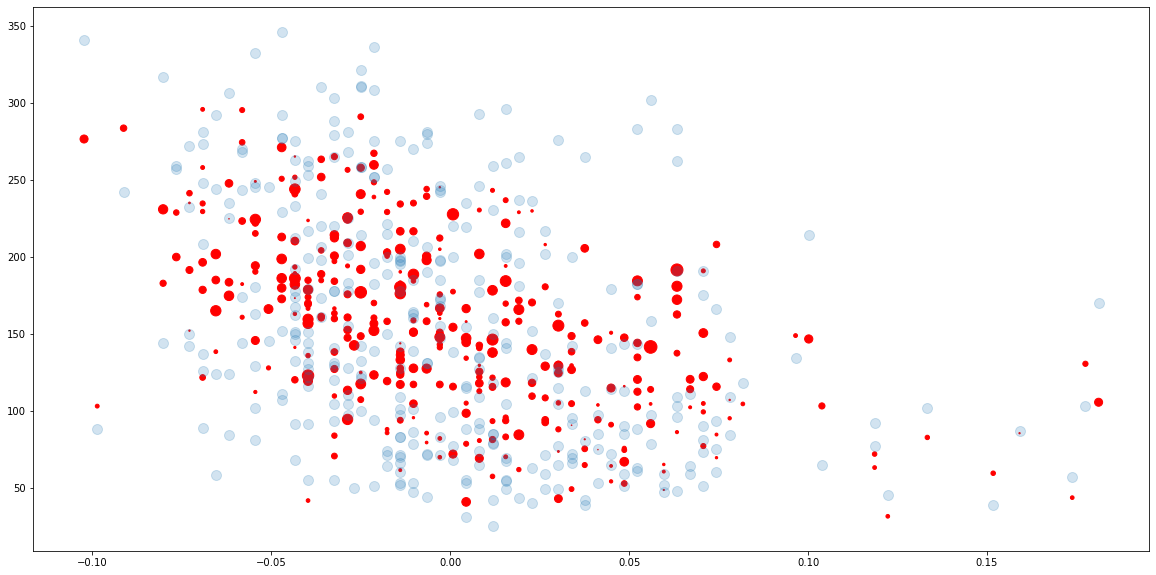

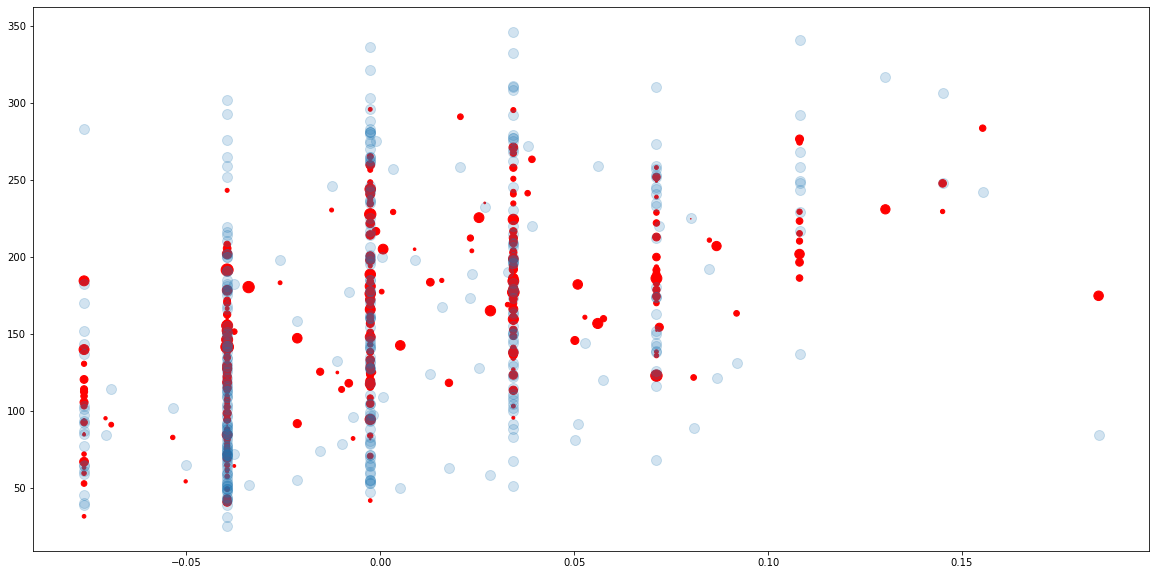

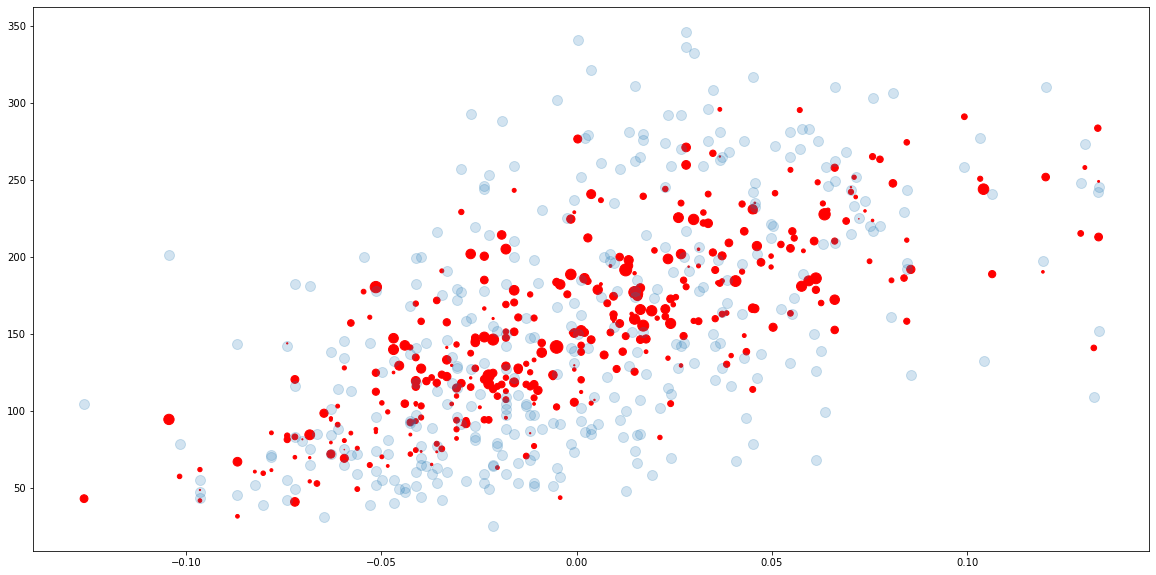

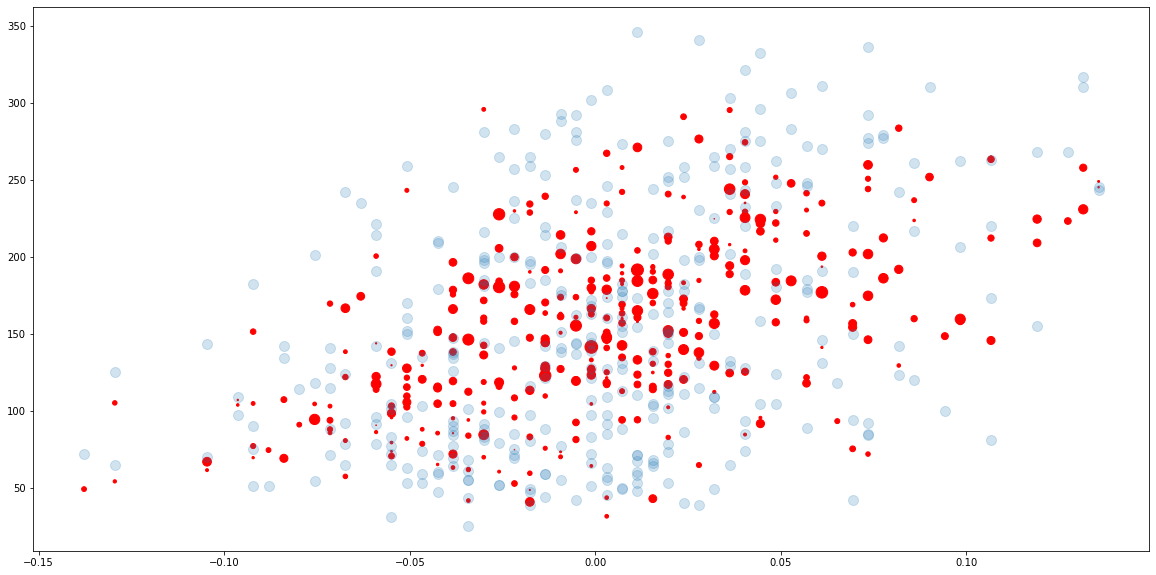

In [54]:
import matplotlib.pyplot as plt 
%matplotlib inline 

n_axis = X_train.shape[1]

# train plots 
import numpy as np
columns = df.columns
# _, axs = plt.subplots(n_axis, figsize=(15, 10))
for axid in range(n_axis):
    _ = plt.figure(figsize=(20, 10))
    plt.scatter(X_train[columns[axid]], y_train_pred, s=np.abs(y_train - y_train_pred), c='r')
    plt.scatter(X_train[columns[axid]], y_train, s=100, alpha=0.2)
    # plt.scatter(X_train[columns[axid]], , alpha=0.5, c='g')
    # axs[axid].scatter(X_train[columns[axid]], y_train_pred, c='r')
    # axs[axid].scatter(X_train[columns[axid]], y_train, alpha=0.2)
    plt.show()
# plt.show()

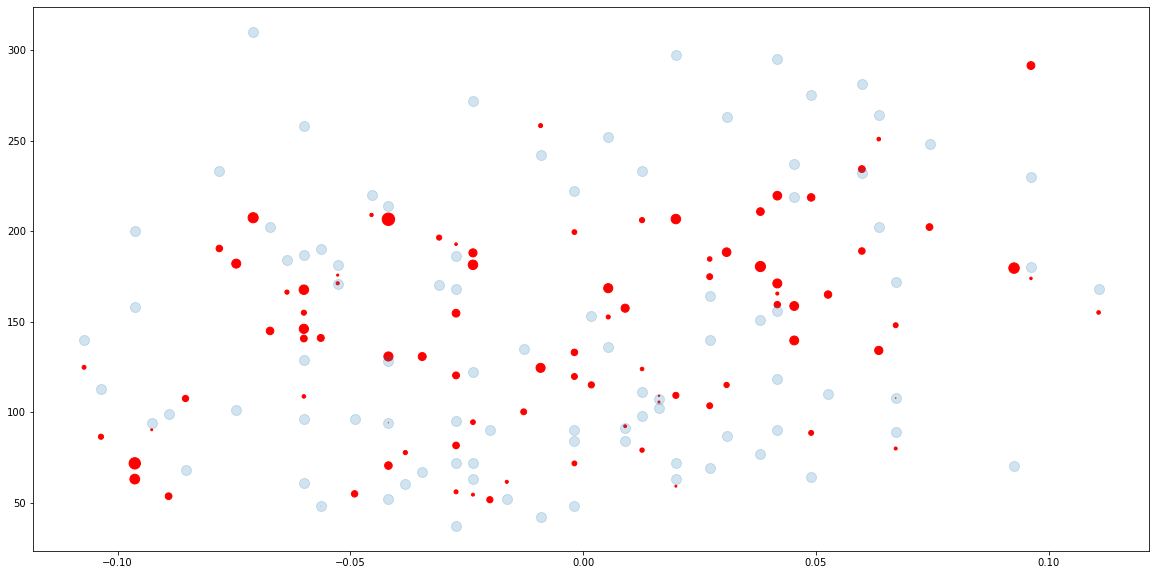

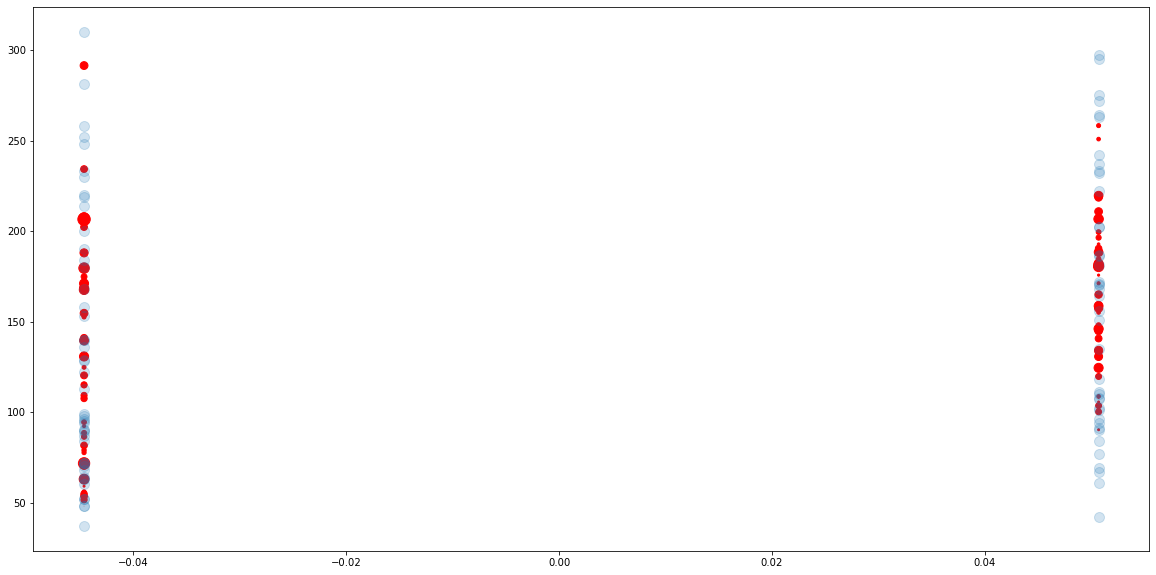

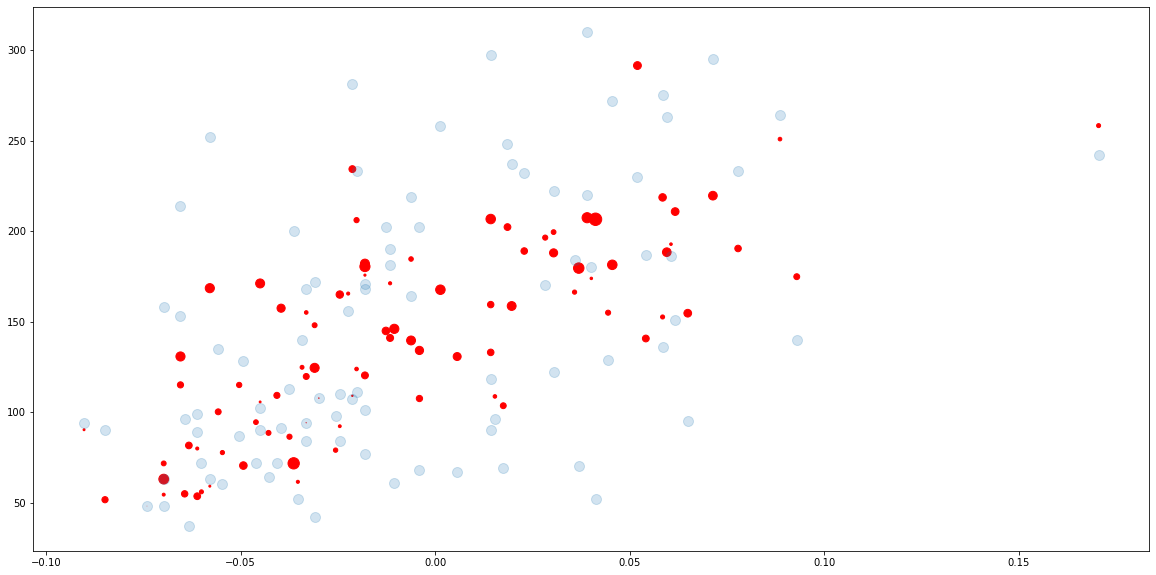

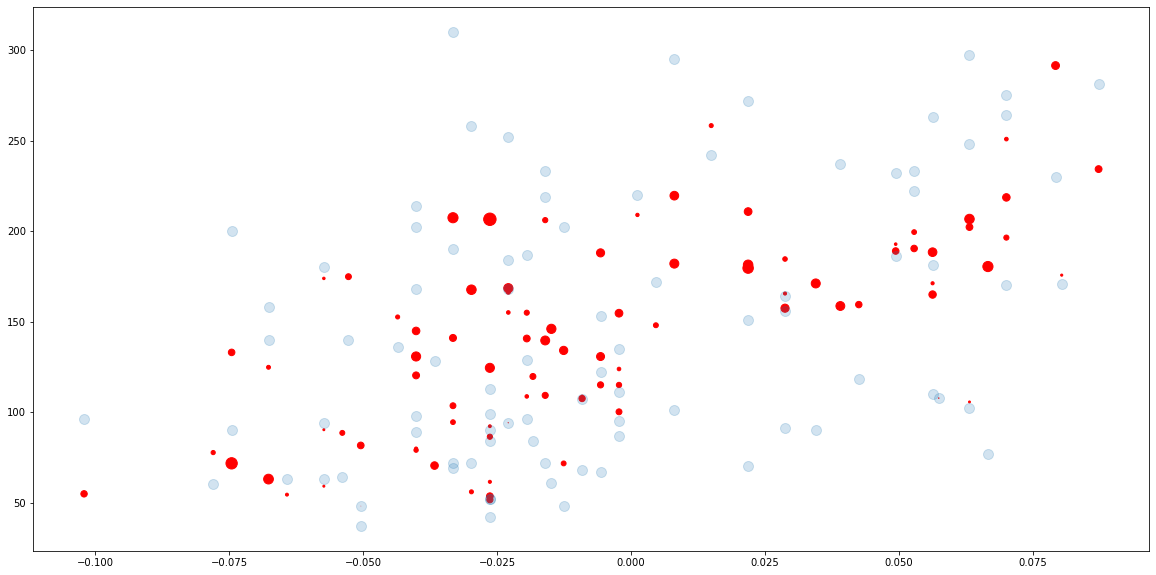

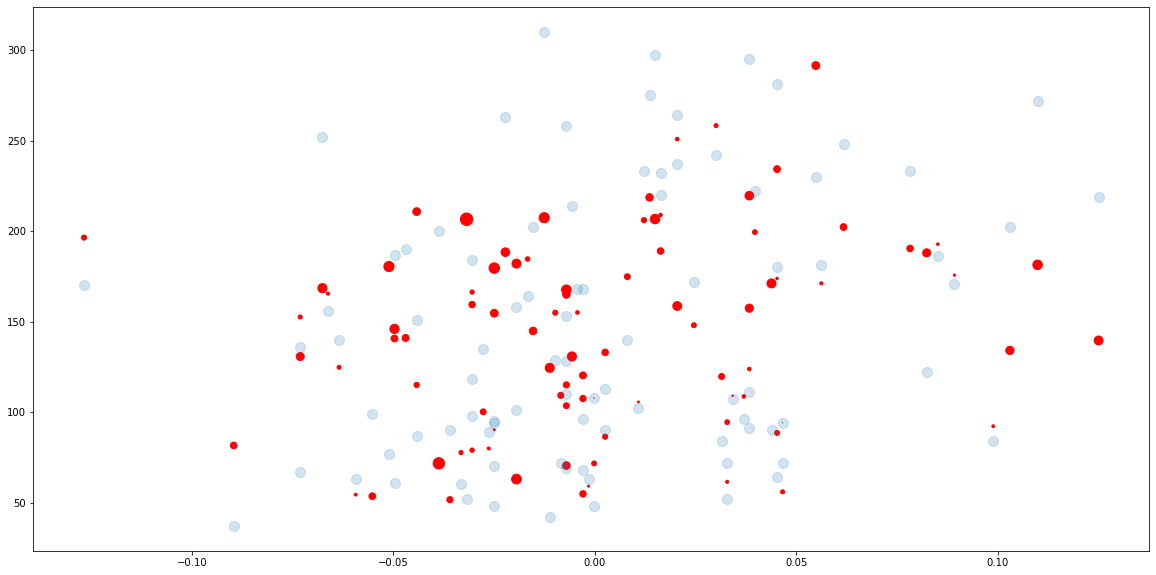

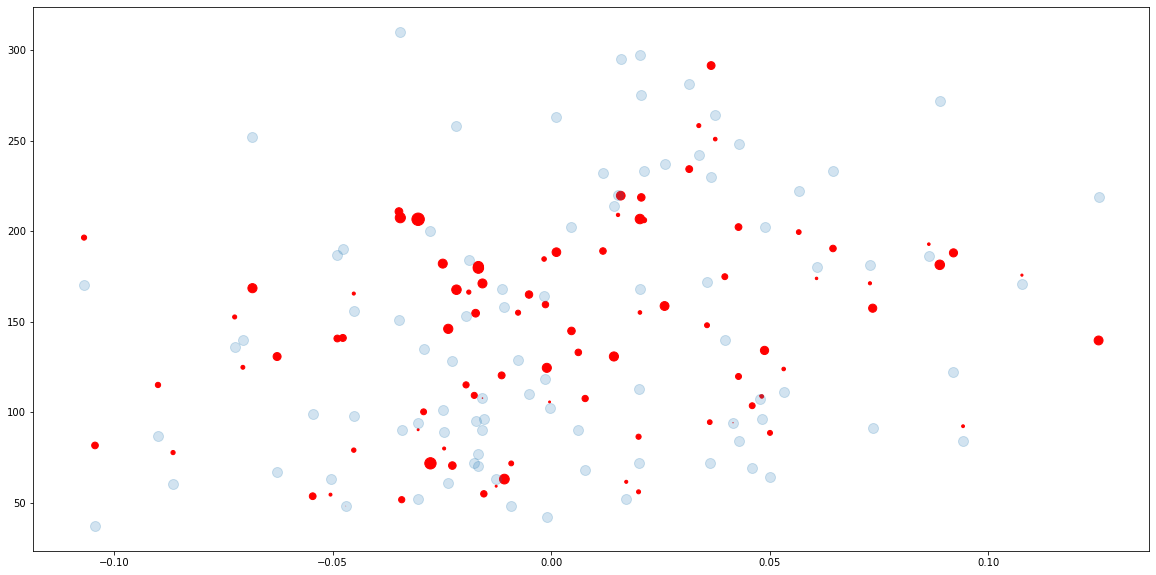

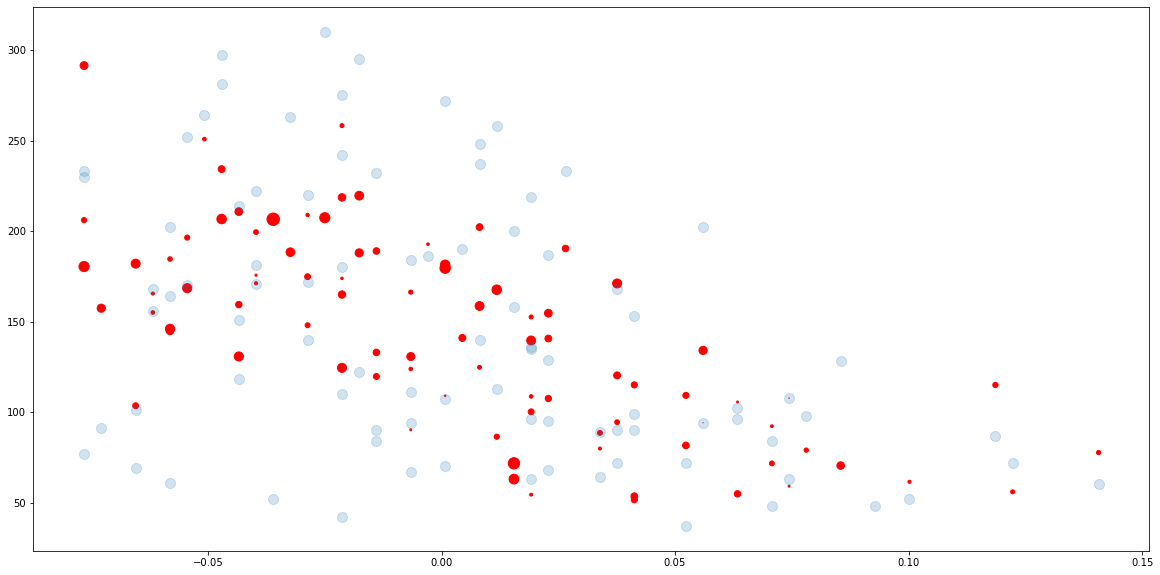

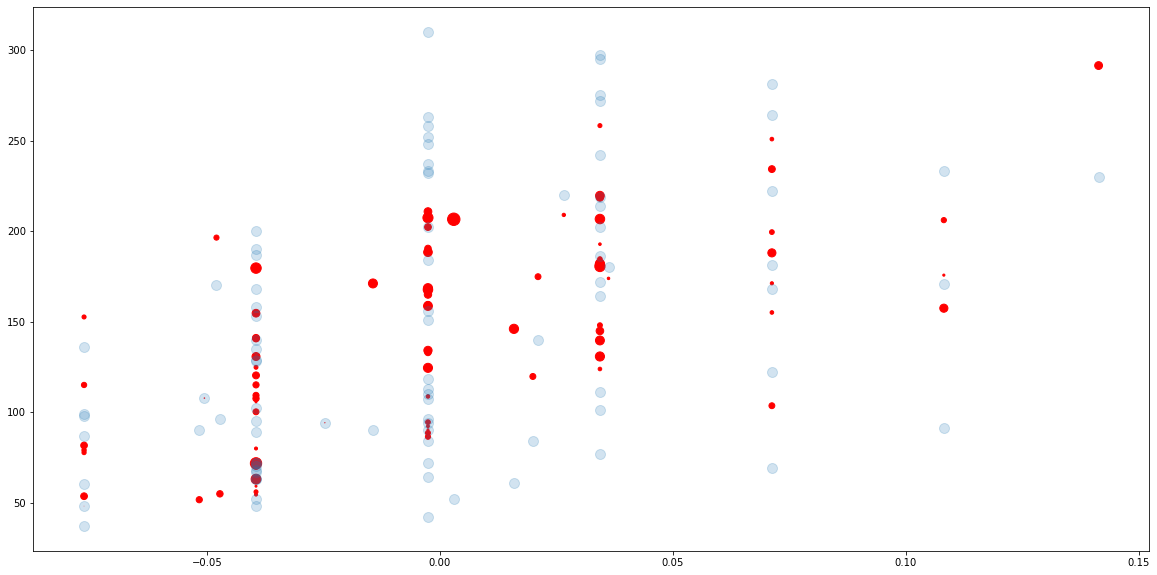

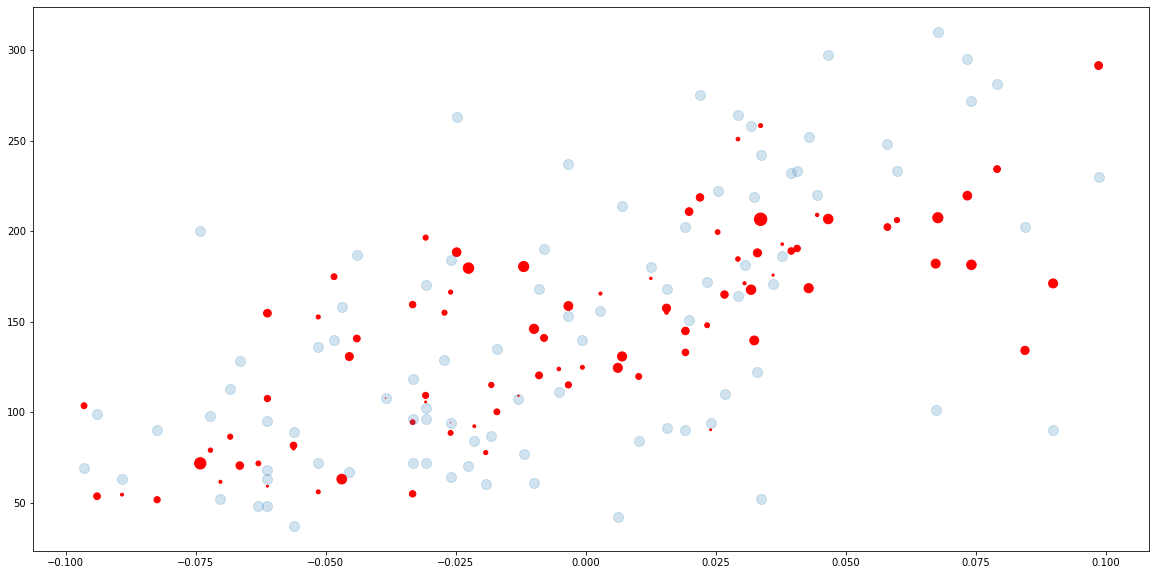

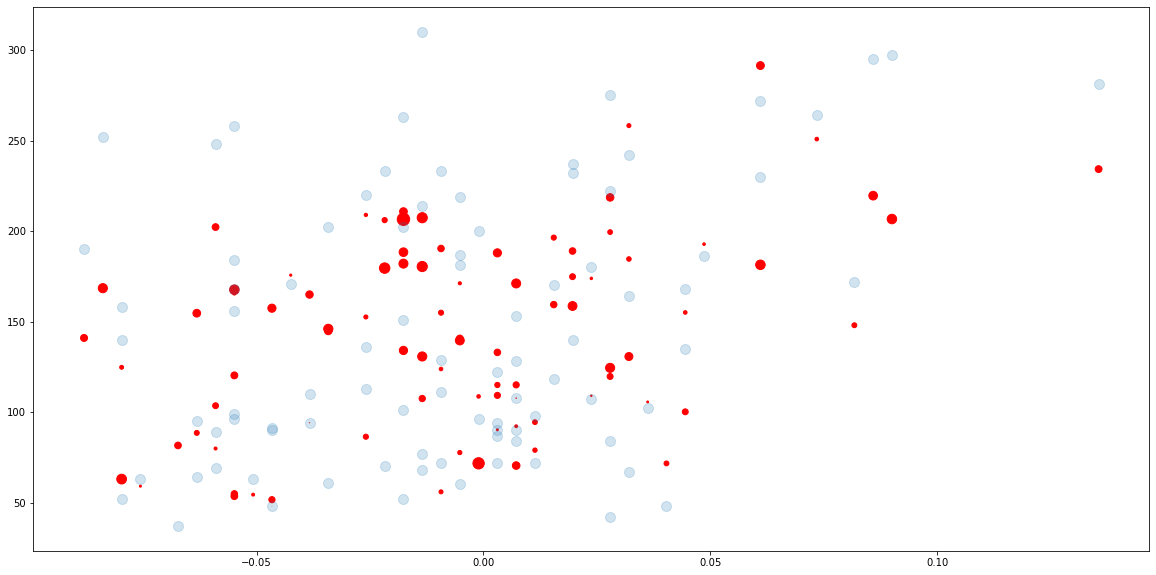

In [55]:
# _, axs = plt.subplots(n_axis, figsize=(15, 10))
for axid in range(n_axis):
    _ = plt.figure(figsize=(20, 10))
    plt.scatter(X_test[columns[axid]], y_test_pred, s=np.abs(y_test - y_test_pred), c='r')
    plt.scatter(X_test[columns[axid]], y_test, s=100, alpha=0.2)
    # plt.scatter(X_train[columns[axid]], , alpha=0.5, c='g')
    # axs[axid].scatter(X_train[columns[axid]], y_train_pred, c='r')
    # axs[axid].scatter(X_train[columns[axid]], y_train, alpha=0.2)
    plt.show()

In [60]:
large_corrs = []
for i in range(n_axis):
    print(f"Main column {columns[i]}")
    for j in range(n_axis):
        corr = df[columns[i]].corr(df[columns[j]])
        corr = round(corr, 2)
        print(f"..Correlation between {columns[i]} and {columns[j]} is {corr}")
        if (corr != 1) and (corr > 0.75 or corr < -0.75):
            large_corrs.append((columns[i], columns[j], corr))

Main column age
..Correlation between age and age is 1.0
..Correlation between age and sex is 0.17
..Correlation between age and bmi is 0.19
..Correlation between age and bp is 0.34
..Correlation between age and s1 is 0.26
..Correlation between age and s2 is 0.22
..Correlation between age and s3 is -0.08
..Correlation between age and s4 is 0.2
..Correlation between age and s5 is 0.27
..Correlation between age and s6 is 0.3
Main column sex
..Correlation between sex and age is 0.17
..Correlation between sex and sex is 1.0
..Correlation between sex and bmi is 0.09
..Correlation between sex and bp is 0.24
..Correlation between sex and s1 is 0.04
..Correlation between sex and s2 is 0.14
..Correlation between sex and s3 is -0.38
..Correlation between sex and s4 is 0.33
..Correlation between sex and s5 is 0.15
..Correlation between sex and s6 is 0.21
Main column bmi
..Correlation between bmi and age is 0.19
..Correlation between bmi and sex is 0.09
..Correlation between bmi and bmi is 1.0
..C

In [61]:
large_corrs

[('s1', 's2', 0.9), ('s2', 's1', 0.9)]

In [77]:
df2 = df.drop(columns=["s2", "s4"], axis=1)
df2 = df2[(df2 > -0.3) & (df2 < 0.3)]
X2 = df2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor
r2 = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
r2 = r2.fit(X2_train, y2_train)

In [117]:
y2_train_pred = r2.predict(X2_train)
y2_test_pred = r2.predict(X2_test)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse1 = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mse2 = mean_squared_error(y_true=y2_test, y_pred=y2_test_pred)
print(f"MSE1 = {mse1}. MSE2 = {mse2}")

MSE1 = 2900.1732878832313. MSE2 = 2941.521570889288
